In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [3]:
df = pd.read_csv('C:\\Users\\Kamrul Hasan\\Desktop\\affairs.csv')
df

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...,...
6361,6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [4]:
from sklearn import preprocessing
from sklearn import utils

# Finding Missing values

In [5]:
df[pd.isnull(df).any(axis=1)]

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs


# correlation

In [6]:
df.corr(method='pearson')

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Unnamed: 0,1.000000,0.264258,-0.108447,-0.142873,-0.127967,0.130736,0.069493,-0.011508,-0.012121,-0.377435
rate_marriage,0.264258,1.000000,-0.111127,-0.128978,-0.129161,0.078794,0.079869,0.039528,0.027745,-0.178068
age,-0.108447,-0.111127,1.000000,0.894082,0.673902,0.136598,0.027960,0.106127,0.162567,-0.089964
yrs_married,-0.142873,-0.128978,0.894082,1.000000,0.772806,0.132683,-0.109058,0.041782,0.128135,-0.087737
children,-0.127967,-0.129161,0.673902,0.772806,1.000000,0.141845,-0.141918,-0.015068,0.086660,-0.070278
religious,0.130736,0.078794,0.136598,0.132683,0.141845,1.000000,0.032245,0.035746,0.004061,-0.125933
educ,0.069493,0.079869,0.027960,-0.109058,-0.141918,0.032245,1.000000,0.382286,0.183932,-0.017740
occupation,-0.011508,0.039528,0.106127,0.041782,-0.015068,0.035746,0.382286,1.000000,0.201156,0.004469
occupation_husb,-0.012121,0.027745,0.162567,0.128135,0.086660,0.004061,0.183932,0.201156,1.000000,-0.015614
affairs,-0.377435,-0.178068,-0.089964,-0.087737,-0.070278,-0.125933,-0.017740,0.004469,-0.015614,1.000000


In [7]:
df.corr(method ='spearman') 

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Unnamed: 0,1.000000,0.257352,-0.118334,-0.163918,-0.139256,0.128167,0.071235,-0.001055,-0.011226,-0.790531
rate_marriage,0.257352,1.000000,-0.099419,-0.138307,-0.135559,0.085139,0.081484,0.043425,0.033114,-0.324958
age,-0.118334,-0.099419,1.000000,0.863842,0.678820,0.125024,0.020795,0.115983,0.177311,0.105706
yrs_married,-0.163918,-0.138307,0.863842,1.000000,0.795219,0.115750,-0.121690,0.039858,0.139457,0.172455
children,-0.139256,-0.135559,0.678820,0.795219,1.000000,0.131155,-0.163694,-0.015865,0.084213,0.131229
religious,0.128167,0.085139,0.125024,0.115750,0.131155,1.000000,0.027973,0.039630,0.002964,-0.140468
educ,0.071235,0.081484,0.020795,-0.121690,-0.163694,0.027973,1.000000,0.417784,0.195873,-0.066809
occupation,-0.001055,0.043425,0.115983,0.039858,-0.015865,0.039630,0.417784,1.000000,0.202511,0.012616
occupation_husb,-0.011226,0.033114,0.177311,0.139457,0.084213,0.002964,0.195873,0.202511,1.000000,0.007177
affairs,-0.790531,-0.324958,0.105706,0.172455,0.131229,-0.140468,-0.066809,0.012616,0.007177,1.000000


# Covariance

In [8]:
df.cov()

,Unnamed: 0,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Unnamed: 0,3.377694e+06,466.934643,-1364.841123,-1911.605577,-337.129262,211.047840,278.170306,-19.931343,-29.992773,-1528.413844
rate_marriage,4.669346e+02,0.924347,-0.731632,-0.902762,-0.178008,0.066541,0.167245,0.035814,0.035915,-0.377218
age,-1.364841e+03,-0.731632,46.893486,44.573021,6.615184,0.821633,0.417014,0.684882,1.498908,-1.357419
yrs_married,-1.911606e+03,-0.902762,44.573021,53.000147,8.064876,0.848457,-1.729237,0.286654,1.256008,-1.407380
children,-3.371293e+02,-0.178008,6.615184,8.064876,2.054839,0.178599,-0.443083,-0.020355,0.167261,-0.221972
religious,2.110478e+02,0.066541,0.821633,0.848457,0.178599,0.771532,0.061687,0.029590,0.004802,-0.243728
educ,2.781703e+02,0.167245,0.417014,-1.729237,-0.443083,0.061687,4.743695,0.784661,0.539389,-0.085133
occupation,-1.993134e+01,0.035814,0.684882,0.286654,-0.020355,0.029590,0.784661,0.888115,0.255242,0.009279
occupation_husb,-2.999277e+01,0.035915,1.498908,1.256008,0.167261,0.004802,0.539389,0.255242,1.812888,-0.046322
affairs,-1.528414e+03,-0.377218,-1.357419,-1.407380,-0.221972,-0.243728,-0.085133,0.009279,-0.046322,4.854856


# Drop  some tables

In [9]:
df.drop(['rate_marriage'], axis=1, inplace=True)

In [10]:
df.head(5)

,Unnamed: 0,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,1,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,2,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,3,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,4,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


# creating x,y and splitting the dataset

In [11]:
y = df.age.copy()
x = df.drop(['age'], axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=123)

# Scalling features

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# KNN Regression Model

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
knn_reg = KNeighborsRegressor()
knn_reg = knn_reg.fit(x_train, y_train)
knn_score=knn_reg.score(x_train, y_train)

In [17]:
y_pred = knn_reg.predict(x_test)
knn_mae = mean_absolute_error(y_test, y_pred)
knn_rmse = sqrt(mean_squared_error(y_test, y_pred))
knn_r2 = r2_score(y_test, y_pred)
print("    Score:", knn_score)
print("    MAE:", knn_mae)
print("    RMSE:", knn_rmse)
print("    R2:", knn_r2)

    Score: 0.8431115556341338
    MAE: 2.3870603015075376
    RMSE: 3.1604218597614926
    R2: 0.7838052822117788


# Linear regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()
lin_reg = lin_reg.fit(x_train, y_train)
lin_score=lin_reg.score(x_train, y_train)

In [20]:
y_pred = lin_reg.predict(x_test)
lin_mae = mean_absolute_error(y_test, y_pred)
lin_rmse = sqrt(mean_squared_error(y_test, y_pred))
lin_r2 = r2_score(y_test, y_pred)
print("    Score:", lin_score)
print("    MAE:", lin_mae)
print("    RMSE:", lin_rmse)
print("    R2:", lin_r2)

    Score: 0.8155702273135307
    MAE: 2.189845345435369
    RMSE: 2.8836978377594242
    R2: 0.8200074754715965


# Random forest regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
regr = RandomForestRegressor()
regr = regr.fit(x_train, y_train)
regr_score=regr.score(x_train, y_train)

In [23]:
y_pred = regr.predict(x_test)
regr_mae = mean_absolute_error(y_test, y_pred)
regr_rmse = sqrt(mean_squared_error(y_test, y_pred))
regr_r2 = r2_score(y_test, y_pred)
print("    Score:",regr_score)
print("    MAE:", regr_mae)
print("    RMSE:", regr_rmse)
print("    R2: ", regr_r2)

    Score: 0.9712910842136219
    MAE: 2.3114290201005026
    RMSE: 3.047378643788476
    R2:  0.7989945633597714


# Support Vector machine

In [24]:
from sklearn import svm

In [25]:
svm_reg = svm.SVR()
svm_reg.fit(x_train, y_train)
svm_score=svm_reg.score(x_train, y_train)

In [26]:
y_pred = svm_reg.predict(x_test)
svm_mae = mean_absolute_error(y_test, y_pred)
svm_rmse = sqrt(mean_squared_error(y_test, y_pred))
svm_r2 = r2_score(y_test, y_pred)
print("    Score:", svm_score)
print("    MAE:", svm_mae)
print("    RMSE:", svm_rmse)
print("    R2:", svm_r2)

    Score: 0.813388972372544
    MAE: 2.061736793942822
    RMSE: 2.9235701028425667
    R2: 0.814995629250466


# PoissonRegressor

In [27]:
from sklearn import linear_model

In [28]:
poisson_reg = linear_model.PoissonRegressor()
poisson_reg.fit(x_train, y_train)
piosson_score=poisson_reg.score(x_train, y_train)

In [29]:
y_pred = poisson_reg.predict(x_test)
piosson_mae = mean_absolute_error(y_test, y_pred)
piosson_rmse = sqrt(mean_squared_error(y_test, y_pred))
piosson_r2 = r2_score(y_test, y_pred)
print("    Score:", piosson_score)
print("    MAE:", piosson_mae)
print("    RMSE:", piosson_rmse)
print("    R2:", piosson_r2)

    Score: 0.7550206253833776
    MAE: 2.6191238651601276
    RMSE: 3.2350482465867874
    R2: 0.7734748176318387


# PLS regression

In [30]:
from sklearn.cross_decomposition import PLSRegression

In [31]:
pls = PLSRegression(n_components=2)
pls.fit(x_train, y_train)
pls_score=pls.score(x_train, y_train)

In [32]:
y_pred = pls.predict(x_test)
pls_mae = mean_absolute_error(y_test, y_pred)
pls_rmse = sqrt(mean_squared_error(y_test, y_pred))
pls_r2 = r2_score(y_test, y_pred)
print("    Score:", pls_score)
print("    MAE:", pls_mae)
print("    RMSE:", pls_rmse)
print("    R2:", pls_r2)

    Score: 0.7824688885058226
    MAE: 2.4006509610418436
    RMSE: 3.1308178089893492
    R2: 0.7878365563767651


# Decision tree

In [33]:
from sklearn import tree

In [34]:
dt  = tree.DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt_score=dt.score(x_train, y_train)

In [35]:
y_pred = dt.predict(x_test)
dt_mae = mean_absolute_error(y_test, y_pred)
dt_rmse = sqrt(mean_squared_error(y_test, y_pred))
dt_r2 = r2_score(y_test, y_pred)
print("    Score:", dt_score)
print("    MAE:", dt_mae)
print("    RMSE:", dt_rmse)
print("    R2:", dt_r2)

    Score: 1.0
    MAE: 2.6485552763819094
    RMSE: 4.069454329847377
    R2: 0.6415510417721226


# AdaBoostRegressor

In [36]:
from sklearn.ensemble import AdaBoostRegressor

In [37]:
regr = AdaBoostRegressor()
regr.fit(x_train, y_train)
ada_score=regr.score(x_train, y_train)

In [38]:
y_pred = regr.predict(x_test)
ada_mae = mean_absolute_error(y_test, y_pred)
ada_rmse = sqrt(mean_squared_error(y_test, y_pred))
ada_r2 = r2_score(y_test, y_pred)
print("    MAE", ada_score)
print("    MAE", ada_mae)
print("    RMSE", ada_rmse)
print("    R2", ada_r2)


    MAE 0.7822615829412558
    MAE 2.6154522736231813
    RMSE 3.144233307739365
    R2 0.7860144276468338


# Gradient-boosting trees

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
reg = GradientBoostingRegressor()
reg.fit(x_train, y_train)
g_b_score=reg.score(x_train, y_train)

In [41]:
y_pred = reg.predict(x_test)
g_b_mae = mean_absolute_error(y_test, y_pred)
g_b_rmse = sqrt(mean_squared_error(y_test, y_pred))
g_b_r2 = r2_score(y_test, y_pred)
print("    Score:", g_b_score)
print("    MAE:", g_b_mae)
print("    RMSE:", g_b_rmse)
print("    R2:", g_b_r2)

    Score: 0.8375384616754042
    MAE: 2.1649667596923132
    RMSE: 2.831341493478242
    R2: 0.8264840221975034


In [42]:
results = pd.DataFrame({
    'Model': ['KNN Regression Model','Linear Regrassion','Random Forest regrassion','Support Vector Machine','Poisson Regressor','PLS Regrassion','Decision Tree','AdaBooster Regrassor','Gradient Bosting tree'],
    'Score':[knn_score,lin_score,regr_score,svm_score,piosson_score,pls_score,dt_score,ada_score,g_b_score],
    'MAE':[knn_mae,lin_mae,regr_mae,svm_mae,piosson_mae,pls_mae,dt_mae,ada_mae,g_b_mae],
    'RMSE':[knn_rmse,lin_rmse,regr_rmse,svm_rmse,piosson_rmse,pls_rmse,dt_rmse,ada_rmse,g_b_rmse],
    'R2':[knn_r2,lin_r2,regr_r2,svm_r2,piosson_r2,pls_r2,dt_r2,ada_r2,g_b_r2]
})

result_df = results.sort_values(by='Score',ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,MAE,RMSE,R2
Score,,,,
1.000000,Decision Tree,2.648555,4.069454,0.641551
0.971291,Random Forest regrassion,2.311429,3.047379,0.798995
0.843112,KNN Regression Model,2.387060,3.160422,0.783805
0.837538,Gradient Bosting tree,2.164967,2.831341,0.826484
0.815570,Linear Regrassion,2.189845,2.883698,0.820007
0.813389,Support Vector Machine,2.061737,2.923570,0.814996
0.782469,PLS Regrassion,2.400651,3.130818,0.787837
0.782262,AdaBooster Regrassor,2.615452,3.144233,0.786014
0.755021,Poisson Regressor,2.619124,3.235048,0.773475


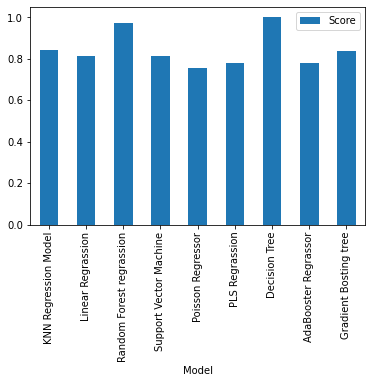

In [43]:


results= pd.DataFrame({'Model': ['KNN Regression Model','Linear Regrassion','Random Forest regrassion','Support Vector Machine','Poisson Regressor','PLS Regrassion','Decision Tree','AdaBooster Regrassor','Gradient Bosting tree'],
                       'Score': [knn_score,lin_score,regr_score,svm_score,piosson_score,pls_score,dt_score,ada_score,g_b_score]})

ax = results.plot.bar(x='Model', y='Score', rot=90)